## PAP, 1ro de julio

In [1]:
#Librerias a utilizar
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import HTML, display_html, display

In [2]:
cd

C:\Users\Alejandro


In [3]:
cd C:/Users/Alejandro/Desktop

C:\Users\Alejandro\Desktop


In [4]:
#Se realiza la lectura del archivo .csv
myFile = pd.read_csv('PAP.csv')

In [5]:
#Se inicializa una nueva variable llamada "structuredData"
structuredData = []

# Jalamos los valores de cada columna en un arreglo, la longitud se toma en cuenta como la longitud del .csv 
# que anteriormente definimos como "myFile"

for i in range(len(myFile)):
    
    #Se jalan del "myFile" las columnas que se van a utilizar, es necesario que se llamen igual que en el .csv
    
    #Jalamos la columa Item del .csv
    itemArr = myFile.loc[:,'Item']
    item = itemArr.values[i]
    
    #Jalamos la columna Types del .csv
    typArr = myFile.loc[:,'Type']
    typ = typArr.values[i]
    
    #Jalamos la columna Inicio del .csv
    inicioArr = myFile.loc[:,'Inicio']
    inicio = inicioArr.values[i]
    
    #Jalamos la columna Fin del .csv
    finArr = myFile.loc[:,'Fin']
    fin = finArr.values[i]
    
    #Jalamos la columna Profit del .csv
    proArr = myFile.loc[:,'Profit']
    profit = proArr.values[i]
    
    #Izquierda y Derecha {first3 : last3}, utilizan o las primeras o las ultimas 3 letras del "Item"
    izq = item[:3]
    der = item[3:]
    
    #Se acomodan la variable "structuredData" con cada una de las variables que se definieron anteriormente
    structuredData.append([izq, der, typ, inicio, fin, profit])

#Se inicializa una nueva variable llamada "finalResult"
finalResult = []

# Meter los valores de cada columna en un arreglo, la longitud se toma en cuenta como la longitud del structuredData

for i in range(len(structuredData)):
    # Valores de la posicion actual del arreglo, la columna en la que va cada variable dentro de nuestro "structuredData"
    izq = structuredData[i][0]
    der = structuredData[i][1]
    typ = structuredData[i][2]
    inicio = structuredData[i][3]
    fin = structuredData[i][4]
    profit = structuredData[i][5]
    
    #Se definen las variables "dif" y "pip" como un 0
    dif = 0
    pip = 0;

    # Condiciona si es sell o buy y pasa a ser el "dif"
    if typ == 'buy':
        dif = fin - inicio
    elif typ == 'sell':
        dif = inicio - fin
        
    # Las condiciones por si es XAU, USO, JPY o ninguna de esas dos. = PIP
    if(structuredData[i][0] == 'xau'):
        pip = (dif * (10))
    elif(structuredData[i][0] == 'uso'):
        pip = (dif * (100))
    elif(structuredData[i][1] == 'jpy'):
        pip = (dif * (100))
    else:
        pip = (dif*(10000))
    
    #Agregamos a nuestro "finalResult" las variables de "dif" y de "pip"
    finalResult.append([izq, der, typ ,round(inicio,2) ,round(fin,2), profit ,round(dif,2) , pip])

    
#Convertimos "finalResult" en un DataFrame y lo llamamos "ResultadoFinal"
ResultadoFinal = pd.DataFrame(finalResult)

#Se nombran las columnas
ResultadoFinal.columns = ['Izq', 'Der', 'Sell/Buy', 'Inicio', 'Fin', 'Profit', 'Dif', 'PIP']

In [6]:
# El siguiente bloque de codigo lo utilizamos para clasificar los PIP's de la transaccion en el tipo
# de trade que entra dicha transaccion dependiendo de sus PIP's, separa entre Scalper, Intradia, Swing

# Se utilizaron los siguientes parametros
# Scalper: Rango de -15 a + 15 pips
# Intradia: Rango de -40 a -16 y +15 a +50 pips
# Swing: Rango menor a -41 pips y mayor a 51 pips

x = ResultadoFinal['PIP']
nueva_lista=[]
for i in range(len(x)):
    if x[i]>=-15 and x[i]<=15:
        nueva_lista.append("Scalper")
    else:
        if x[i]>=-16 and x[i]<=16:
            nueva_lista.append("Intradia")
        else:
            if x[i]>=-40 and x[i]<=50:
                nueva_lista.append("Intradia")
            else:
                nueva_lista.append("Swing")

#Definimos la variable de "colnames" como la lista de todas las columnas de "ResultadoFinal" asignada arriba                
colnames = list(ResultadoFinal.columns)

#Creamos una nueva variable llamada "Tipo" que va con el "ResultadoFinal"
ResultadoFinal["Tipo"] = nueva_lista

#Insertamos en la columna 7 esta variable creada arriba
colnames.insert(7,'Tipo')

#Esta nueva tabla con "Tipo" incluido se denomino como "Tabla_Final"
Tabla_Final = ResultadoFinal[colnames]

#Hace display a "Tabla Final"
print(Tabla_Final)

     Izq  Der Sell/Buy   Inicio      Fin  Profit    Dif      Tipo    PIP
0    gbp  usd     sell     1.31     1.31   -2.70  -0.00   Scalper   -0.9
1    gbp  usd     sell     1.31     1.31   -0.75  -0.00   Scalper   -1.5
2    gbp  jpy     sell   146.56   146.38    1.54   0.17  Intradia   17.2
3    gbp  jpy     sell   146.68   146.39    2.64   0.30  Intradia   29.5
4    eur  jpy     sell   126.44   126.30    1.34   0.15   Scalper   15.0
5    gbp  jpy     sell   146.75   146.41    6.04   0.34  Intradia   33.8
6    aud  usd      buy     0.71     0.72    9.55   0.00  Intradia   19.1
7    gbp  aud     sell     1.83     1.83    2.94   0.00  Intradia   41.0
8    aud  usd      buy     0.71     0.72    2.02   0.00  Intradia   20.2
9    gbp  nzd     sell     1.94     1.93    5.76   0.00  Intradia   42.6
10   gbp  usd     sell     1.31     1.31    6.70   0.00  Intradia   33.5
11   xau  usd      buy  1280.90  1273.94  -13.92  -6.96     Swing  -69.6
12   xau  usd      buy  1284.19  1274.16  -20.06 -1

Tu trader tiene una preferencia de tipo Intradia con 122 de 227 totales de trades realizados


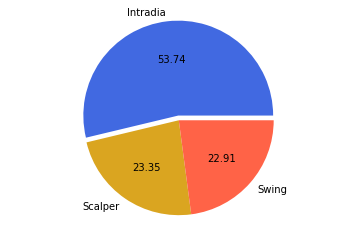

In [7]:
#Contador de trades realizados, utilizamos la herramienta de "count" de la libreria "Counter"

#Contamos cuantos trades fueron Intradia
ic = nueva_lista.count("Intradia")

#Contamos cuantos trades fueron Scalper
sc = nueva_lista.count("Scalper")

#Contamos cuantos trades fueron Swing
swc = nueva_lista.count("Swing")

#Cramos la variable "listado" que incluye los numeros de trades contabilizados en las variables
# ic (Intadia), sc(Scalper), swc(Swing)
listado = [ic, sc, swc]

#Definimos una nueva varible llamada "ttrades", la cual jala la longitud de la variable "x",
#esto con el fin de tener el valor total de cuantos trades se realizaron
ttrades = len(x)

#Extraemos el maximo valor de "listacond" para poder imprimir que tipo de preferencia tiene el trader
listacond = max(listado)

if listacond == ic:
    print("Tu trader tiene una preferencia de tipo Intradia con", ic, "de", ttrades, "totales de trades realizados")
else:
    if listacond == sc:
        print("Tu trader tiene una preferencia de tipo Scalper con", sc, "de", ttrades, "totales de trades realizados")
    else:
        print("Tu trader tiene una preferencia de tipo Swing con", swc, "de", ttrades, "totales de trades realizados")

#Etiquetas de la grafica de pastel
labels = 'Intradia', 'Scalper', 'Swing'
#Recordar que el nombre de las etiquetas tienen que estar en el mismo orden como se asignan las variables

#Notese como se pone "Intradia" y en "sizes" la primer variable es "ic", que arriba se definio como Intradia
sizes = [ic, sc, swc]

#Parametros de la grafica de pastel
colors = ['royalblue', 'goldenrod', 'tomato'] #Colores
explode = (0.05, 0, 0)  #Separa el primer pedazo de la grafica de las otras 2
plt.pie(sizes, explode, labels, colors, autopct='%.2f') #Condiciones para grafica de pastel
plt.axis('equal') #Condicionante

#Imprime la grafica de pastel
plt.show()

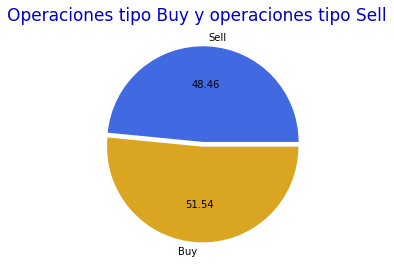

In [8]:
#Porcentaje de ventas y compras realizados (de las transacciones totales)

#Definimos una nueva variable llamada "nueva_lista2", la cual es la columna de "Type" en "myFile"
nueva_lista2 = myFile["Type"]

#Definimos una variable que cuantificara la cantidad de los tipos de variables que hay
#en este caso, nos dira cuantos "Buy" y cuantos "Sell" hay en la lista (son las unicas 2 palabras que se usan en Type)
ic2 = nueva_lista2.value_counts("")

#Creamos una nueva variable que convierte "ic2" en una lista para poder manipularla mas facilmente
ic3 = ic2.tolist()

#Definimos las variables buy2 y sell2 que nos ayudan a obtener el porcentaje de trades que se hicieron
#en ic3 tanto de compra como de venta como de venta
buy2 = (ic3[0])/len(nueva_lista2)
sell2 = (ic3[1])/len(nueva_lista2)

#Etiquetas de la grafica de pastel
labels = 'Sell', 'Buy'
#Recordar que el nombre de las etiquetas tienen que estar en el mismo orden como se asignan las variables

#Notese como se pone "sell2" y en "sizes" la primer variable es "sell2", que arriba se definio como Sell
sizes = [sell2, buy2]

#Parametros de la grafica de pastel
colors = ['royalblue', 'goldenrod'] #Colores
explode = (0.05, 0) #Separa el primer pedazo de la grafica de la otra
plt.pie(sizes, explode, labels, colors, autopct=('%.2f')) #Condiciones para grafica de pastel
plt.axis('equal') #Condicionante\

#Imprime la grafica de pastel
plt.suptitle('Operaciones tipo Buy y operaciones tipo Sell', color = 'mediumblue', size = 17)
plt.show()

In [9]:
#se hace una condicion en la cual ponga una columna de 0 y 1 si el profit es negativo o positivo
k = ResultadoFinal['Profit']
dd = []

for i in range(len(k)):
    if k[i]>0:
        dd.append(1)
    else:
        if k[i]<0:
            dd.append(0)

colnames2=list(Tabla_Final.columns)
Tabla_Final["ProfitB"] = dd
Tabla_Final2=Tabla_Final[colnames2]

C:\Users\Alejandro\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


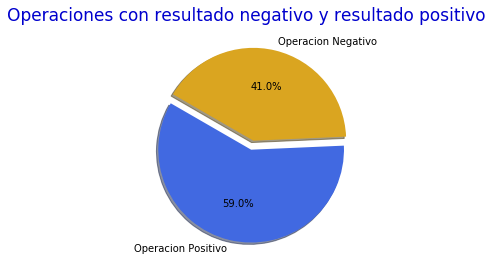

In [10]:
#Contador de tipo de trades realizados
#de esta manera al sumar los 1 son la cantidad de profit positivo y asi podemos sacar el ratio
trpo = sum(dd)
ttrades2 = ttrades - trpo

gano = trpo
perdio = ttrades2

#Parametros de la lista
labels = ('Operacion Positivo', 'Operacion Negativo')
sizes = [gano, perdio]
colors = ['royalblue', 'goldenrod']
explode = (0.1, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.suptitle('Operaciones con resultado negativo y resultado positivo', color = 'mediumblue', size = 17)
plt.show()

In [11]:
k = ResultadoFinal['Profit']
kk= ResultadoFinal['Sell/Buy']
dsell=[]
dbuy=[]

#condicional en el cual ponga 1 si son sell o buy dependiendo la condicion y que sea positivo el profit, sino poner 0
#condicional de sell 
for i in range(len(k)):
    if kk[i]=="sell":
        if k[i]>0:
            dsell.append(1)
        else:
            if k[i]<0:
                dsell.append(0)
    else:
        dsell.append(0)
                                            
colnames4=list(Tabla_Final2.columns)
Tabla_Final2["profitsell"] = dsell
Tabla_Final4=Tabla_Final2[colnames4]

 #condicional de buy
for i in range(len(k)):
    if kk[i]=="buy":
        if k[i]>0:
            dbuy.append(1)
        else:
            if k[i]<0:
                dbuy.append(0)
    else:
        dbuy.append(0)
                                                          
colnames5=list(Tabla_Final4.columns)
Tabla_Final2["profitbuy"] = dbuy
Tabla_Final5=Tabla_Final2[colnames5]
buy1=ic3[0]
sell1=ic3[1]

z=Tabla_Final2['profitsell']
zz=Tabla_Final2['profitbuy']

 #de esta manera al sumar los 1 son la cantidad de sell o buy co profit positivo y asi podemos sacar el ratio
zsum=sum(z)
zzsum=sum(zz)

rgsell=zzsum/sell1
rgbuy=zsum/buy1

rpsell = 1-rgsell
rpbuy = 1-rgbuy

#Contador de tipo de trades realizados

gano = rgbuy
perdio = rpbuy

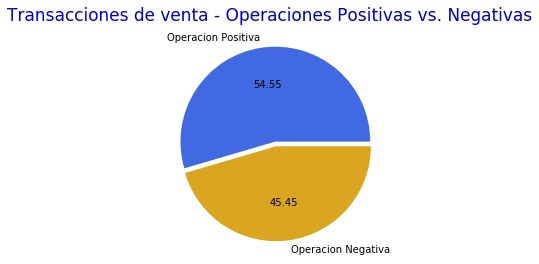

In [12]:
#Sell
gano2 = rgsell
perdio2 = rpsell

#Parametros de la lista
labels = ('Operacion Positiva', 'Operacion Negativa')
sizes = [gano2, perdio2]
colors = ['royalblue', 'goldenrod']
explode = (0.05, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
plt.axis('equal')
plt.suptitle('Transacciones de venta - Operaciones Positivas vs. Negativas', color = 'mediumblue', size = 17)
plt.show()

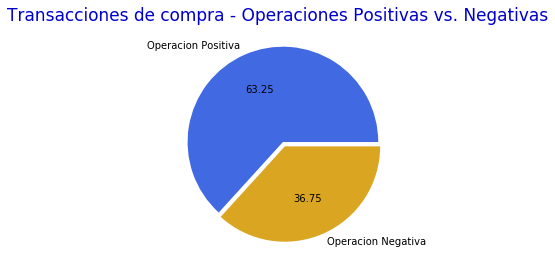

In [13]:
#Buy
gano3 = rgbuy
perdio3 = rpbuy

#Parametros de la lista
labels = ('Operacion Positiva', 'Operacion Negativa')
sizes = [gano3, perdio3]
colors = ['royalblue', 'goldenrod']
explode = (0.05, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode, labels, colors, autopct=('%.2f'))
plt.axis('equal')
plt.suptitle('Transacciones de compra - Operaciones Positivas vs. Negativas', color = 'mediumblue', size = 17)
plt.show()

### En la siguiente parte del codigo, se obtiene el Top 5 de los activos que el trader mas utilizo y obtuvimos su ratio de acertividad junto con las ganancias que cada uno de estos activos le genero al trader

In [14]:
#Convertimos la columna de Items en una lista
df = itemArr.tolist()
#Usamos la funcion Counter para contar cuantas veces se repiten las palabras
counter = Counter(df)
#Asignamos una variable que escoge las Top 5 transacciones mas repetidas
top5 = counter.most_common(5)
#Convertimos  el Top 5 de transacciones en DataFrame para manipularlo como grafica
top5frame = pd.DataFrame(top5)

In [15]:
#Top 5 - 1er Activo
var1 = top5frame.iloc[0,0]
deurusd=[]

for i in range(len(k)):
    if df[i] == var1:
        if k[i]>0:
            deurusd.append(1)
        else:
            if k[i]<0:
                deurusd.append(0)
    else:
        deurusd.append(0)

#Juntamos la nueva columna a la tabla
colnames6=list(Tabla_Final2.columns)
Tabla_Final2["Top 5 - #1"] = deurusd
Tabla_Final6=Tabla_Final2[colnames6]

In [16]:
#Top 5 - 2ndo Activo
var2 = top5frame.iloc[1,0]
dusdcad=[]

for i in range(len(k)):
    if df[i]==var2:
        if k[i]>0:
            dusdcad.append(1)
        else:
            if k[i]<0:
                dusdcad.append(0)
    else:
        dusdcad.append(0)

#Juntamos la nueva columna a la tabla
colnames7=list(Tabla_Final2.columns)
Tabla_Final2["Top 5 - #2"] = dusdcad
Tabla_Final7=Tabla_Final2[colnames7]

In [17]:
#Top 5 - 3er Activo
var3 = top5frame.iloc[2,0]
daudusd=[]

for i in range(len(k)):
    if df[i]==var3:
        if k[i]>0:
            daudusd.append(1)
        else:
            if k[i]<0:
                daudusd.append(0)
    else:
        daudusd.append(0)

#Juntamos la nueva columna a la tabla
colnames8=list(Tabla_Final2.columns)
Tabla_Final2["Top 5 - #3"] = daudusd
Tabla_Final8=Tabla_Final2[colnames8]

In [18]:
#Top 5 - 4to Activo 
var4 = top5frame.iloc[3,0]
dxauusd=[]

for i in range(len(k)):
    if df[i]==var4:
        if k[i]>0:
            dxauusd.append(1)
        else:
            if k[i]<0:
                dxauusd.append(0)
    else:
        dxauusd.append(0)

#Juntamos la nueva columna a la tabla
colnames9=list(Tabla_Final2.columns)
Tabla_Final2["Top 5 - #4"] = dxauusd
Tabla_Final9=Tabla_Final2[colnames9]

In [19]:
#Top 5 - 5to Activo 
var5 = top5frame.iloc[4,0]
dgbpusd=[]

for i in range(len(k)):
    if df[i]==var5:
        if k[i]>0:
            dgbpusd.append(1)
        else:
            if k[i]<0:
                dgbpusd.append(0)
    else:
        dgbpusd.append(0)

#Juntamos la nueva columna a la tabla
colnames10=list(Tabla_Final2.columns)
Tabla_Final2["Top 5 - #5"] = dgbpusd
Tabla_Final10=Tabla_Final2[colnames10]

### Ahora para sacar los PIP's, filtraremos nuestros datos a los Top 5

In [20]:
#Top 5 - 1er Activo, PIP's, este programa es para identificar este item
var1 = top5frame.iloc[0,0]
deurusd1=[]

for i in range(len(k)):
    if df[i] == var1:
        deurusd1.append(1)
    else:
        deurusd1.append(0)

#Juntamos la nueva columna a la tabla
colnames11=list(Tabla_Final2.columns)
Tabla_Final2["#1"] = deurusd1
Tabla_Final11=Tabla_Final2[colnames11]

In [21]:
#Top 5 - 2ndo Activo, PIP's, este programa es para identificar este item
var2 = top5frame.iloc[1,0]
dusdcad1=[]

for i in range(len(k)):
    if df[i]==var2:
        dusdcad1.append(1)
    else:
        dusdcad1.append(0)

#Juntamos la nueva columna a la tabla
colnames12=list(Tabla_Final2.columns)
Tabla_Final2["#2"] = dusdcad1
Tabla_Final12=Tabla_Final2[colnames12]

In [22]:
#Top 5 - 3er Activo, PIP's, este programa es para identificar este item
var3 = top5frame.iloc[2,0]
daudusd1=[]

for i in range(len(k)):
    if df[i]==var3:
        daudusd1.append(1)
    else:
        daudusd1.append(0)

#Juntamos la nueva columna a la tabla
colnames13=list(Tabla_Final2.columns)
Tabla_Final2["#3"] = daudusd1
Tabla_Final13=Tabla_Final2[colnames13]

In [23]:
#Top 5 - 4to Activo,  PIP's, este programa es para identificar este item
var4 = top5frame.iloc[3,0]
dxauusd1=[]

for i in range(len(k)):
    if df[i]==var4:
        dxauusd1.append(1)
    else:
        dxauusd1.append(0)
        
#Juntamos la nueva columna a la tabla
colnames14=list(Tabla_Final2.columns)
Tabla_Final2["#4"] = dxauusd1
Tabla_Final14=Tabla_Final2[colnames14]

In [24]:
#Top 5 - 5to Activo, PIP's, este programa es para identificar este item
var5 = top5frame.iloc[4,0]
dgbpusd1=[]

for i in range(len(k)):
    if df[i]==var5:
        dgbpusd1.append(1)
    else:
        dgbpusd1.append(0)
#Juntamos la nueva columna a la tabla
colnames15=list(Tabla_Final2.columns)
Tabla_Final2["#5"] = dgbpusd1
Tabla_Final15=Tabla_Final2[colnames15]

In [25]:
#Asigmos nuevo nombre a variables
eu=deurusd
uc=dusdcad
au=daudusd
xu=dxauusd
gu=dgbpusd

#Asigmos nuevo nombre a variables
peu=deurusd1
puc=dusdcad1
pau=daudusd1
pxu=dxauusd1
pgu=dgbpusd1

#Total de cuantos "1" hay en cada item
eu1=sum(eu)
uc1=sum(uc)
au1=sum(au)
xu1=sum(xu)
gu1=sum(gu)

#Asignamos nombre a cada una de las opciones respecto a su posicion en la tabla
opc1 = top5frame.iloc[0,1]
opc2 = top5frame.iloc[1,1]
opc3 = top5frame.iloc[2,1]
opc4 = top5frame.iloc[3,1]
opc5 = top5frame.iloc[4,1]

In [26]:
#La suma de los PIP's de los top 5 instrumentos
x = ResultadoFinal['PIP']
pip1=x*peu
pip2=x*puc
pip3=x*pau
pip4=x*pxu
pip5=x*pgu

sumpip1=sum(pip1)
sumpip2=sum(pip2)
sumpip3=sum(pip3)
sumpip4=sum(pip4)
sumpip5=sum(pip5)

In [27]:
#Grado de acertividad de cada activo
reu=(eu1/opc1)
ruc=(uc1/opc2)
rau=(au1/opc3)
rxu=(xu1/opc4)
rgu=(gu1/opc5)

In [28]:
#Multiplicacion del profit por cada item, esto para saber cuanto dinero se gano
deu=k*eu
duc=k*uc
dau=k*au
dxu=k*xu
dgu=k*gu

In [29]:
#Sumando el total de dinero ganado
ddeu=(sum(deu))
dduc=(sum(duc))
ddau=(sum(dau))
ddxu=(sum(dxu))
ddgu=(sum(dgu))

   Activo  Cantidad
0  eurusd        39
1  usdcad        26
2  audusd        22
3  xauusd        17
4  gbpusd        15


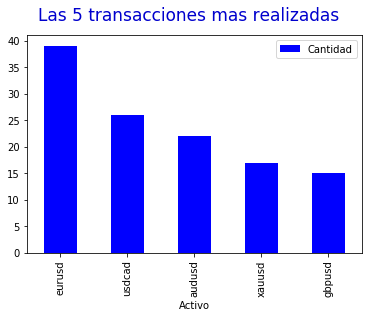

   Activo  Ratio %  Ganancias $  Ganancias PIP
0  eurusd     74.0       304.83          319.8
1  usdcad     42.0        88.17          -57.1
2  audusd     55.0        96.68          -22.0
3  xauusd     53.0        71.96         -285.6
4  gbpusd     80.0        60.42          111.9


In [30]:
#Lista de los Top 5 tipos de trade
listaprueba1 = (var1, var2, var3, var4, var5)
listaprueba2 = list(listaprueba1)

#Lista de los grados de acertividad
listaprueba3 = ((round(reu,2)*100),round(ruc,2)*100,round(rau,2)*100,round(rxu,2)*100,round(rgu,2)*100)
listaprueba4 = list(listaprueba3)

#Lista de las ganancias de estos trades
listaprueba5 = (round(ddeu,2), round(dduc,2), round(ddau,2), round(ddxu,2), round(ddgu,2))
listaprueba6 = list(listaprueba5)

#Lista de las ganancias en PIP de estos trades
listaprueba7 = (round(sumpip1,2), round(sumpip2,2), round(sumpip3,2), round(sumpip4,2), round(sumpip5,2))
listaprueba8 = list(listaprueba7)

#Union de las listas con titulos
res = zip(listaprueba2, listaprueba4, listaprueba5)
res2 = pd.DataFrame(list(zip(listaprueba2, listaprueba4, listaprueba6, listaprueba8)),
              columns=['Activo','Ratio %', 'Ganancias $', 'Ganancias PIP'])

#Le ponemos titulos a las filas del DataFrame
top5frame.columns=["Activo", "Cantidad"]
#Titulo
display(HTML('<h3>Tabla de activos mas tradeados</h3>'))
#Mostramos el DataFrame con formato
print(top5frame)
#Hacemos una grafica de barras con los ejes de Activo y Cantidad, color azul
top5frame.plot(kind='bar',x='Activo',y='Cantidad',color='blue')
#Imprimimos la grafica
plt.suptitle('Las 5 transacciones mas realizadas', color = 'mediumblue', size = 17)
plt.show()

#Imprimimos la matriz creada anteriomente que nos junta activo, ratio y ganancia
print(res2)

In [36]:
#Extraemos si es sell o buy
second_column = Tabla_Final.iloc[: , 2]
#Extraemos el tipo de trade
first_column = Tabla_Final.iloc[: , 7]
#Las juntamos en una sola fila
c1 = (first_column + second_column)
#Contamos cuantos trades de cada tipo ahay
c2 = Counter(c1)
#Convertimos el contador en un DataFrame para manipularlo
c3 = pd.DataFrame(c2, index = [0])

#Jalamos la cantidad de Operaciones Exitosas
c4 = c3.iloc[0,0]
c5 = c3.iloc[0,1]
c6 = c3.iloc[0,2]
c7 = c3.iloc[0,3]
c8 = c3.iloc[0,4]
c9 = c3.iloc[0,5]

#Jalamos los nombres
c04=c3.iloc[0:0]
c05= list(c04)
n1 = c05[0] #intradia buy
n2 = c05[1] #intradia sell
n3 = c05[2] #scalper buy
n4 = c05[3] #scalper sell
n5 = c05[4] #swing buy
n6 = c05[5] #swing sell

#Ponemos condiciones
cc=(c1)
ccc=[]
for i in range(len(cc)):
    if cc[i]=="Intradiasell":
        if k[i]>0:
            ccc.append("is")
    elif cc[i]=="Intradiabuy":
        if k[i]>0:
            ccc.append("ib")
    elif cc[i]=="Scalpersell":
        if k[i]>0:
            ccc.append("ss")
    elif cc[i]=="Scalperbuy":
        if k[i]>0:
            ccc.append("sb")
    elif cc[i]=="Swingsell":
        if k[i]>0:
            ccc.append("sws")
    elif cc[i]=="Swingbuy":
        if k[i]>0:
            ccc.append("swb")
    else:
        ccc.append("no")

#Contamos las condiciones
c10=Counter(ccc)
#Convertimos las condicionales en un DataFrame para manipulacion
c11=pd.DataFrame(c10, index=[0])
#Jalamos la cantidad de operaciones exitosas
c12=c11.iloc[0,0] #Operaciones exitosas de Intradiabuy
c13=c11.iloc[0,1] #Operaciones exitosas de Intradiasell
c14=c11.iloc[0,2] #Operaciones exitosas de Scalperbuy
c15=c11.iloc[0,3] #Operaciones exitosas de Scalpersell
c16=c11.iloc[0,4] #Operaciones exitosas de Swingbuy
c17=c11.iloc[0,5] #Operaciones exitosas de Swingsell

In [37]:
#Ratio de acertividad
rib=c12/c4
ris=c13/c5
rsb=c14/c6
rss=c15/c7
rswb=c16/c8
rsws=c17/c9

In [40]:
#Lista de los Top 5 tipos de trade y si es sell o buy
listaprueba9 = (n1, n2, n3, n4, n5, n6)
listaprueba10 = list(listaprueba9)

#Lista  de numero de operaciones
listaprueba11 = (c4,c5,c6,c7,c8,c9)
listaprueba12 = list(listaprueba11)
listaprueba15 = (c12, c13, c14, c15, c16, c17)
listaprueba16 = list(listaprueba15)

#Lista de los grados de acertividad
listaprueba13 = ((round(rib,4)*100),round(ris,4)*100,round(rsb,4)*100,round(rss,4)*100,round(rswb,4)*100,round(rsws,4)*100)
listaprueba14 = list(listaprueba13)

#Union de las listas con titulos
res3 = pd.DataFrame(list(zip(listaprueba10, listaprueba12, listaprueba16, listaprueba14)),
        columns=['TIPO/OPERACION','TOTAL OPERACIONES','OPERACIONES EXITOSAS','RATIO ACERTIVIDAD %'])
print(res3)

  TIPO/OPERACION  TOTAL OPERACIONES  OPERACIONES EXITOSAS  RATIO ACERTIVIDAD %
0    Intradiabuy                 55                    36                65.45
1   Intradiasell                 67                    45                67.16
2     Scalperbuy                 26                    19                73.08
3    Scalpersell                 27                    16                59.26
4       Swingbuy                 29                     5                17.24
5      Swingsell                 23                    13                56.52
